# Neuroimaging Analysis Replication and Prediction Study (NARPS)

Here, we specify the statistical model in the [NARPS](https://www.narps.info/) study using a BIDS Stats Model. The dataset is publicaly available on [OpenNeuro](https://openneuro.org/datasets/ds001734/).

In [1]:
import json
from pathlib import Path
from itertools import chain

import numpy as np
import pandas as pd

from nilearn.plotting import plot_design_matrix

import bids
from bids.modeling import BIDSStatsModelsGraph
from bids.layout import BIDSLayout

def api(obj):
    return {attr: getattr(obj, attr) for attr in dir(obj) if not attr[0] == '_'}

/home/zorro/anaconda3/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
layout = BIDSLayout('./ds001734/')

In [3]:
json_file = './model-narps_smdl.json'
spec = json.loads(Path(json_file).read_text())
spec

{'Name': 'NARPS',
 'Description': 'NARPS Analysis model',
 'BIDSModelVersion': '1.0.0',
 'Input': {'task': 'MGT'},
 'Nodes': [{'Level': 'Run',
   'Name': 'run',
   'GroupBy': ['run', 'subject'],
   'Transformations': {'Transformer': 'pybids-transforms-v1',
    'Instructions': [{'Name': 'Threshold',
      'Input': ['gain'],
      'Binarize': True,
      'Output': ['trials']},
     {'Name': 'Scale',
      'Input': ['gain', 'loss', 'RT'],
      'Demean': True,
      'Rescale': False,
      'Output': ['gain', 'loss', 'demeaned_RT']},
     {'Name': 'Convolve',
      'Model': 'spm',
      'Input': ['trials', 'gain', 'loss', 'demeaned_RT']}]},
   'Model': {'X': ['trials', 'gain', 'loss', 'demeaned_RT', 1], 'Type': 'glm'},
   'DummyContrasts': {'Conditions': ['trials', 'gain', 'loss'], 'Test': 't'}},
  {'Level': 'Subject',
   'Name': 'subject',
   'GroupBy': ['subject', 'contrast'],
   'Model': {'X': [1], 'Type': 'meta'},
   'DummyContrasts': {'Test': 't'}},
  {'Level': 'Dataset',
   'Name': '

In [4]:
spec['Input'] = {
    'task': 'MGT',
    'subject': ['001', '002', '003']
}

In [5]:
graph = BIDSStatsModelsGraph(layout, spec)

In [109]:
graph.variables

AttributeError: 'BIDSStatsModelsGraph' object has no attribute 'variables'

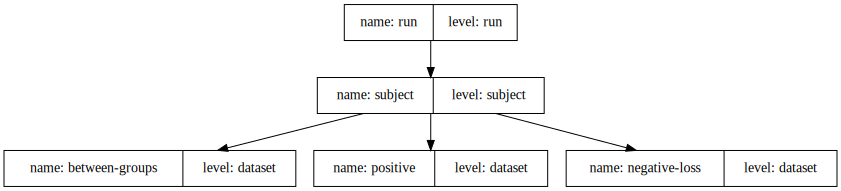

In [6]:
graph.write_graph(format='svg')

In [7]:
root_node = graph.root_node

In [110]:
root_node.get_collections()

[<BIDSRunVariableCollection['loss', 'gain', 'RT', 'participant_response']>,
 <BIDSRunVariableCollection['loss', 'gain', 'RT', 'participant_response']>,
 <BIDSRunVariableCollection['loss', 'gain', 'RT', 'participant_response']>,
 <BIDSRunVariableCollection['loss', 'gain', 'RT', 'participant_response']>,
 <BIDSRunVariableCollection['loss', 'gain', 'RT', 'participant_response']>,
 <BIDSRunVariableCollection['loss', 'gain', 'RT', 'participant_response']>,
 <BIDSRunVariableCollection['loss', 'gain', 'RT', 'participant_response']>,
 <BIDSRunVariableCollection['loss', 'gain', 'RT', 'participant_response']>,
 <BIDSRunVariableCollection['loss', 'gain', 'RT', 'participant_response']>,
 <BIDSRunVariableCollection['loss', 'gain', 'RT', 'participant_response']>,
 <BIDSRunVariableCollection['loss', 'gain', 'RT', 'participant_response']>,
 <BIDSRunVariableCollection['loss', 'gain', 'RT', 'participant_response']>]

In [8]:
try:
    graph.load_collections()
except ValueError:
    graph.load_collections(scan_length=453)  # TR = 1, nvols = 453

In [9]:
coll = root_node.get_collections()[0]

In [105]:
coll.variables['loss']

<SparseRunVariable(name='loss', source='events')>

In [10]:
specs = root_node.run(group_by=root_node.group_by, force_dense=False)

/home/zorro/repos/pybids/bids/modeling/statsmodels.py:728: UserWarning: Use 'Contrasts' not 'Conditions' or 'ConditionList' to specifyDummyContrasts. Renaming to 'Contrasts' for now.
  warnings.warn(


In [107]:
root_node

<BIDSStatsModelsNode(level=run, name=run)>

In [89]:
s.model_spec.

In [104]:
graph

<BIDSStatsModelsGraph[{name='NARPS', description='NARPS Analysis model', ... }]>

In [50]:
min_graph

{'name': 'NARPS', 'description': 'NARPS Analysis model'}

In [51]:
graph.model

{'name': 'NARPS',
 'description': 'NARPS Analysis model',
 'bids_model_version': '1.0.0',
 'input': {'task': 'MGT', 'subject': ['001', '002', '003']},
 'nodes': [{'level': 'Run',
   'name': 'run',
   'group_by': ['run', 'subject'],
   'transformations': {'transformer': 'pybids-transforms-v1',
    'instructions': [{'name': 'Threshold',
      'input': ['gain'],
      'binarize': True,
      'output': ['trials']},
     {'name': 'Scale',
      'input': ['gain', 'loss', 'RT'],
      'demean': True,
      'rescale': False,
      'output': ['gain', 'loss', 'demeaned_RT']},
     {'name': 'Convolve',
      'model': 'spm',
      'input': ['trials', 'gain', 'loss', 'demeaned_RT']}]},
   'model': {'x': ['trials', 'gain', 'loss', 'demeaned_RT', 1], 'type': 'glm'},
   'dummy_contrasts': {'test': 't', 'contrasts': ['trials', 'gain', 'loss']}},
  {'level': 'Subject',
   'name': 'subject',
   'group_by': ['subject', 'contrast'],
   'model': {'x': [1], 'type': 'meta'},
   'dummy_contrasts': {'test': 't'

In [37]:
reprlib.Repr(maxdict=2).repr(graph.model)

TypeError: __init__() got an unexpected keyword argument 'maxdict'

In [11]:
s = specs[0]

In [24]:
s

<BIDSStatsModelsNodeOutput[<BIDSStatsModelsNode[run] run>]>

In [22]:
self

<BIDSStatsModelsNode[run] run>

In [19]:
f"<{self.__class__.__name__}[{self.level}] {self.name}>"

In [ ]:
api(specs[0])

In [ ]:
specs[0]

In [ ]:
plot_design_matrix(specs[0].X)

In [ ]:
specs[0].entities

In [ ]:
specs[0].metadata

In [ ]:
bold = layout.get(**specs[0].entities, suffix='bold', extension='.nii.gz')[0]

In [ ]:
# import nilearn.glm
# l1m = nilearn.glm.first_level.FirstLevelModel()
# l1m.fit(bold.get_image(), design_matrices=specs[0].X)

In [ ]:
next_node = root_node.children[0].destination

In [ ]:
next_node.group_by

In [ ]:
root_node.children[0].filter

In [ ]:
contrasts = list(chain(*[s.contrasts for s in specs]))
sub_specs = next_node.run(contrasts, group_by=next_node.group_by)

In [ ]:
api(sub_specs[3])

In [ ]:
ds1_node = next_node.children[1].destination
api(ds1_node)

In [ ]:
next_node.children[1].filter

In [ ]:
sub_contrasts = list(chain(*[s.contrasts for s in sub_specs]))
ds1_specs = ds1_node.run(sub_contrasts, group_by=ds1_node.group_by, **next_node.children[1].filter)

In [ ]:
%debug

In [ ]:
ds1_specs[0].X

In [ ]:
pd.concat((ds1_specs[0].data, ds1_specs[0].metadata), axis=1)

In [ ]:
ds1_specs[0].contrasts

In [ ]:
ds0_node = next_node.children[0].destination 
ds0_specs = ds0_node.run(sub_contrasts, group_by=ds0_node.group_by)

In [ ]:
ds0_specs

In [ ]:
ds0_specs[1].X

In [ ]:
pd.concat((ds0_specs[0].data, ds0_specs[0].metadata), axis=1)

In [ ]:
ds2_node = next_node.children[2].destination 
filters = next_node.children[2].filter or {}
print(filters)
ds2_specs = ds2_node.run(sub_contrasts, group_by=ds2_node.group_by, **filters)
print(ds2_specs)

In [ ]:
api(ds2_specs[0])

In [ ]:
ds2_specs[0].X

In [ ]:
pd.concat((ds2_specs[0].data, ds2_specs[0].metadata), axis=1)

In [ ]:
api(ds1_node)

In [ ]:
graph.nodes

In [ ]:
graph.root_node.children

In [ ]:
graph.root_node.children[0].destination.children

In [ ]:
graph.root_node.children[0].destination.children[2].destination.name